In [1]:
#importing Libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
#reading the file
car = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
car.shape

(205, 26)

In [4]:
#splitting the car name into company name and model name
car[['company','model']] = car.CarName.str.split('\\s',n = 1, expand = True)

In [5]:
car.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company,model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [6]:
#dropping the CarName column
car = car.drop('CarName', axis=1)

In [7]:
#replacing 4 with f in drivewheel column as 4wd = fwd
car['drivewheel'] = car['drivewheel'].str.replace('4wd', 'fwd')
car['company']=car['company'].str.replace('maxda','mazda')
car['company']=car['company'].str.replace('Nissan','nissan')
car['company']=car['company'].str.replace('porcshce','porsche')
car['company']=car['company'].str.replace('saab','subaru')
car['company']=car['company'].str.replace('toyouta','toyota')
car['company']=car['company'].str.replace('vokswagen','volkswagen')
car['company']=car['company'].str.replace('vw','volkswagen')

In [8]:
car.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company',
       'model'],
      dtype='object')

In [9]:
import copy

In [10]:
car_temp = copy.deepcopy(car)

In [11]:
#dropping the non-numeric values
car_temp = car_temp.drop(['car_ID','company','model'], axis =1)

In [12]:

car_temp['symboling']=car_temp['symboling'].astype(str)

In [13]:
#creating suffix to identify variables after creating dummy variables

car_temp['symboling'] = car_temp['symboling'] + " symb"
car_temp['aspiration'] = car_temp['aspiration'] + " aspi"
car_temp['doornumber'] = car_temp['doornumber'] + " no_door"
car_temp['enginelocation'] = car_temp['enginelocation'] + " eng_loc"
car_temp['drivewheel'] = car_temp['drivewheel'] + " drv_whl"
car_temp['enginetype'] = car_temp['enginetype'] + " eng_typ"
car_temp['cylindernumber'] = car_temp['cylindernumber'] + " no_cyl"
car_temp['fuelsystem'] = car_temp['fuelsystem'] + " fuel_sys"


In [14]:
car_temp.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3 symb,gas,std aspi,two no_door,convertible,rwd drv_whl,front eng_loc,88.6,168.8,64.1,...,130,mpfi fuel_sys,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3 symb,gas,std aspi,two no_door,convertible,rwd drv_whl,front eng_loc,88.6,168.8,64.1,...,130,mpfi fuel_sys,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1 symb,gas,std aspi,two no_door,hatchback,rwd drv_whl,front eng_loc,94.5,171.2,65.5,...,152,mpfi fuel_sys,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2 symb,gas,std aspi,four no_door,sedan,fwd drv_whl,front eng_loc,99.8,176.6,66.2,...,109,mpfi fuel_sys,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2 symb,gas,std aspi,four no_door,sedan,fwd drv_whl,front eng_loc,99.4,176.6,66.4,...,136,mpfi fuel_sys,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
#creating Dummy variables
#dropping the first variable as we can conclude the first one with other present variable

#symboling
symboling  = pd.get_dummies(car_temp['symboling'],drop_first= True)

#fuel type has 2 categories
fueltype = pd.get_dummies(car_temp['fueltype'], drop_first= True)

#aspiration has 2 categories
aspiration = pd.get_dummies(car_temp['aspiration'], drop_first= True)

#doornumber has 2 categories
doornumber = pd.get_dummies(car_temp['doornumber'], drop_first= True)

#drivewheel has 2 categories
drivewheel = pd.get_dummies(car_temp['drivewheel'], drop_first= True)

#engine location has 2 categories
enginelocation = pd.get_dummies(car_temp['enginelocation'], drop_first= True)

#enginesize has 3 categories
cylindernumber = pd.get_dummies(car_temp['cylindernumber'], drop_first= True)

#fuelsystem has 2 categories
fuelsystem = pd.get_dummies(car_temp['fuelsystem'], drop_first= True)

#Carbody dummies
carbody = pd.get_dummies(car_temp['carbody'], drop_first=True)

#enginetype
enginetype = pd.get_dummies(car_temp['enginetype'],drop_first= True)

In [16]:
#adding the resulting dummy variables into main dataframe
car_temp = pd.concat([car_temp,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,cylindernumber,fuelsystem,carbody,enginetype], axis = 1)

In [17]:
car_temp.head(10)[car_temp.columns[-20:]]

,three no_cyl,twelve no_cyl,two no_cyl,2bbl fuel_sys,4bbl fuel_sys,idi fuel_sys,mfi fuel_sys,mpfi fuel_sys,spdi fuel_sys,spfi fuel_sys,hardtop,hatchback,sedan,wagon,dohcv eng_typ,l eng_typ,ohc eng_typ,ohcf eng_typ,ohcv eng_typ,rotor eng_typ
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [18]:
#droppung the orignal variables after adding dummy variables
car_temp = car_temp.drop(['fueltype','symboling','aspiration','doornumber','drivewheel','cylindernumber','fuelsystem','carbody','enginetype','enginelocation'], axis=1)

In [19]:
#normalising the data
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))

#appplying it to all the columns
car_temp = car_temp.apply(normalize)

car_temp.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,hardtop,hatchback,sedan,wagon,dohcv eng_typ,l eng_typ,ohc eng_typ,ohcf eng_typ,ohcv eng_typ,rotor eng_typ
0,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,...,-0.039024,-0.341463,-0.468293,-0.121951,-0.004878,-0.058537,-0.721951,-0.073171,-0.063415,-0.019512
1,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.011671,0.100174,-0.274007,-0.071409,0.028679,...,-0.039024,-0.341463,-0.468293,-0.121951,-0.004878,-0.058537,-0.721951,-0.073171,-0.063415,-0.019512
2,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.094689,-0.464111,0.102184,-0.071409,0.207846,...,-0.039024,0.658537,-0.468293,-0.121951,-0.004878,-0.058537,-0.721951,-0.073171,0.936585,-0.019512
3,0.030420,0.038071,0.024350,0.047927,-0.084781,-0.067575,-0.099826,0.068850,-0.008909,-0.008821,...,-0.039024,-0.341463,0.531707,-0.121951,-0.004878,-0.058537,0.278049,-0.073171,-0.063415,-0.019512
4,0.018758,0.038071,0.041016,0.047927,0.104125,0.034312,-0.099826,0.068850,-0.133909,0.045346,...,-0.039024,-0.341463,0.531707,-0.121951,-0.004878,-0.058537,0.278049,-0.073171,-0.063415,-0.019512


In [20]:
car_temp.shape

(205, 47)

In [21]:
car_temp.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', '-2 symb', '0 symb',
       '1 symb', '2 symb', '3 symb', 'gas', 'turbo aspi', 'two no_door',
       'rwd drv_whl', 'rear eng_loc', 'five no_cyl', 'four no_cyl',
       'six no_cyl', 'three no_cyl', 'twelve no_cyl', 'two no_cyl',
       '2bbl fuel_sys', '4bbl fuel_sys', 'idi fuel_sys', 'mfi fuel_sys',
       'mpfi fuel_sys', 'spdi fuel_sys', 'spfi fuel_sys', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv eng_typ', 'l eng_typ',
       'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ', 'rotor eng_typ'],
      dtype='object')

In [22]:
#putting feature variable into X
X = car_temp[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '-2 symb', '0 symb',
       '1 symb', '2 symb', '3 symb', 'gas', 'turbo aspi', 'two no_door',
       'rwd drv_whl', 'rear eng_loc', 'five no_cyl', 'four no_cyl',
       'six no_cyl', 'three no_cyl', 'twelve no_cyl', 'two no_cyl',
       '2bbl fuel_sys', '4bbl fuel_sys', 'idi fuel_sys', 'mfi fuel_sys',
       'mpfi fuel_sys', 'spdi fuel_sys', 'spfi fuel_sys', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv eng_typ', 'l eng_typ',
       'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ', 'rotor eng_typ']]
#putting response cariable in Y
y = car_temp['price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,test_size = 0.3, random_state = 100)

In [25]:

import statsmodels.api as sm

X_train = sm.add_constant(X_train)

/home/chandan/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/home/chandan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
lm_1 = sm.OLS(y_train, X_train).fit() #running the linear model

In [27]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     48.05
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           3.16e-50
Time:                        19:53:13   Log-Likelihood:                 250.54
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     100   BIC:                            -287.7
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
wheelbase            0.1078      0.112  

In [28]:
# Function for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [29]:
len(X_train.columns)

46

In [30]:
#importing the rfe libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True False  True False  True  True  True  True False  True  True False
  True  True False False False False False  True False False  True False
  True False  True  True  True False False False False False  True False
  True  True  True  True False False  True  True  True  True]
[ 1  6  1  3  1  1  1  1  5  1  1 12  1  1  9  8  7 18 16  1 20  2  1 14
  1 13  1  1  1 19 11 10 21 17  1 22  1  1  1  1  4 15  1  1  1  1]


In [32]:
col = X_train.columns[rfe.support_]


In [33]:
col

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'highwaympg', '-2 symb',
       'turbo aspi', 'rear eng_loc', 'four no_cyl', 'three no_cyl',
       'twelve no_cyl', 'two no_cyl', 'spdi fuel_sys', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ',
       'rotor eng_typ'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [35]:
 
import statsmodels.api as sm  

X_train_rfe.columns

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'highwaympg', '-2 symb',
       'turbo aspi', 'rear eng_loc', 'four no_cyl', 'three no_cyl',
       'twelve no_cyl', 'two no_cyl', 'spdi fuel_sys', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ',
       'rotor eng_typ'],
      dtype='object')

In [36]:
lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

In [37]:
#Let's see the summary of our linear model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              83.58
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                    4.16e-63
Time:                        19:53:15   Log-Likelihood:                          238.27
No. Observations:                 143   AIC:                                     -428.5
Df Residuals:                     119   BIC:                                     -357.4
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [38]:
X_train.columns.difference(X_train_rfe.columns)

Index(['0 symb', '1 symb', '2 symb', '2bbl fuel_sys', '3 symb',
       '4bbl fuel_sys', 'carheight', 'carlength', 'citympg',
       'compressionratio', 'dohcv eng_typ', 'five no_cyl', 'gas',
       'idi fuel_sys', 'l eng_typ', 'mfi fuel_sys', 'mpfi fuel_sys',
       'rwd drv_whl', 'six no_cyl', 'spfi fuel_sys', 'two no_door'],
      dtype='object')

In [39]:
print(X_train.columns)
X_train_rfe.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '-2 symb', '0 symb', '1 symb',
       '2 symb', '3 symb', 'gas', 'turbo aspi', 'two no_door', 'rwd drv_whl',
       'rear eng_loc', 'five no_cyl', 'four no_cyl', 'six no_cyl',
       'three no_cyl', 'twelve no_cyl', 'two no_cyl', '2bbl fuel_sys',
       '4bbl fuel_sys', 'idi fuel_sys', 'mfi fuel_sys', 'mpfi fuel_sys',
       'spdi fuel_sys', 'spfi fuel_sys', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'dohcv eng_typ', 'l eng_typ', 'ohc eng_typ', 'ohcf eng_typ',
       'ohcv eng_typ', 'rotor eng_typ'],
      dtype='object')


Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'highwaympg', '-2 symb',
       'turbo aspi', 'rear eng_loc', 'four no_cyl', 'three no_cyl',
       'twelve no_cyl', 'two no_cyl', 'spdi fuel_sys', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ',
       'rotor eng_typ'],
      dtype='object')

In [40]:
vif_cal(input_data=car_temp.drop(X_train.columns.difference(X_train_rfe.columns), axis = 1), dependent_col = "price")

/home/chandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,rotor eng_typ,inf
15,two no_cyl,inf
3,enginesize,19.95
2,curbweight,18.63
19,sedan,14.33
18,hatchback,12.01
6,horsepower,10.79
0,wheelbase,7.54
20,wagon,7.16
1,carwidth,6.32


In [41]:
# Now let's use our model to make predictions.

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)


/home/chandan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:

# Making predictions
y_pred = lm.predict(X_test_rfe)

Text(0, 0.5, 'Price')

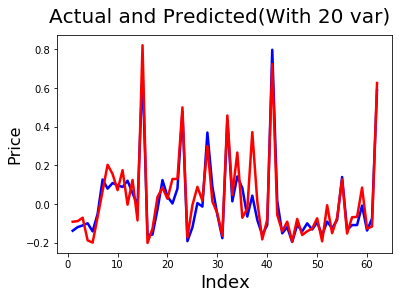

In [43]:
%matplotlib inline
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted(With 20 var)', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)    

Text(0, 0.5, 'ytest-ypred')

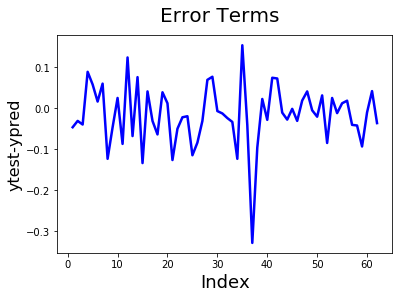

In [44]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'y_pred')

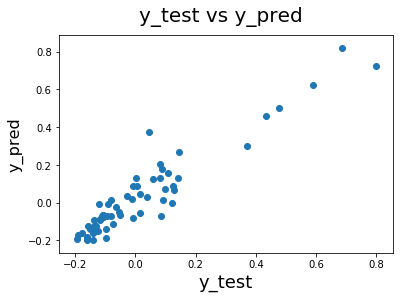

In [45]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'Index')

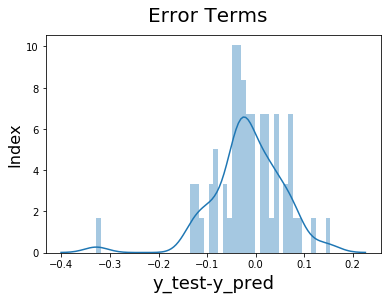

In [46]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                  

In [47]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.07499911376896007


# SECOND MODEL

In [48]:
#creating a second model

In [49]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 28)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True False  True  True  True  True  True  True False  True  True False
  True  True False False False False False  True False  True  True False
  True False  True  True  True False False False False False  True False
  True  True  True  True  True False  True  True  True  True]
[ 1  3  1  1  1  1  1  1  2  1  1  9  1  1  6  5  4 15 13  1 17  1  1 11
  1 10  1  1  1 16  8  7 18 14  1 19  1  1  1  1  1 12  1  1  1  1]


In [50]:
col = X_train.columns[rfe.support_]

In [51]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '-2 symb', '0 symb', '1 symb',
       '2 symb', '3 symb', 'gas', 'turbo aspi', 'two no_door', 'rwd drv_whl',
       'rear eng_loc', 'five no_cyl', 'four no_cyl', 'six no_cyl',
       'three no_cyl', 'twelve no_cyl', 'two no_cyl', '2bbl fuel_sys',
       '4bbl fuel_sys', 'idi fuel_sys', 'mfi fuel_sys', 'mpfi fuel_sys',
       'spdi fuel_sys', 'spfi fuel_sys', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'dohcv eng_typ', 'l eng_typ', 'ohc eng_typ', 'ohcf eng_typ',
       'ohcv eng_typ', 'rotor eng_typ'],
      dtype='object')

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
X_train_rfe.columns

Index(['wheelbase', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'highwaympg', '-2 symb',
       'turbo aspi', 'rwd drv_whl', 'rear eng_loc', 'four no_cyl',
       'three no_cyl', 'twelve no_cyl', 'two no_cyl', 'spdi fuel_sys',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv eng_typ',
       'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ', 'rotor eng_typ'],
      dtype='object')

In [54]:
X_train_rfe.drop(labels =['wheelbase','carheight','dohcv eng_typ'], axis =1, inplace = True)

/home/chandan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
X_train_rfe.drop(columns = ['enginesize'], inplace = True)

In [56]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

In [57]:
# Now let's use our model to make predictions.

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

print(X_train_rfe.columns)
X_test_rfe.columns

Index(['carwidth', 'curbweight', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'highwaympg', '-2 symb', 'turbo aspi', 'rwd drv_whl',
       'rear eng_loc', 'four no_cyl', 'three no_cyl', 'twelve no_cyl',
       'two no_cyl', 'spdi fuel_sys', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ', 'rotor eng_typ'],
      dtype='object')


/home/chandan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Index(['carwidth', 'curbweight', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'highwaympg', '-2 symb', 'turbo aspi', 'rwd drv_whl',
       'rear eng_loc', 'four no_cyl', 'three no_cyl', 'twelve no_cyl',
       'two no_cyl', 'spdi fuel_sys', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'ohc eng_typ', 'ohcf eng_typ', 'ohcv eng_typ', 'rotor eng_typ'],
      dtype='object')

In [58]:
X_test_rfe.drop(columns = ['wheelbase', 'carheight', 'dohcv eng_typ'], inplace = True)

KeyError: "['wheelbase' 'carheight' 'dohcv eng_typ'] not found in axis"

In [59]:
col = list(X_train_rfe.columns)

In [60]:
col.append('price')

In [61]:
vif_cal(input_data=car_temp[col], dependent_col = "price")

/home/chandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
23,rotor eng_typ,inf
14,two no_cyl,inf
1,curbweight,15.93
18,sedan,10.71
17,hatchback,10.02
4,horsepower,7.77
11,four no_cyl,5.36
2,boreratio,5.33
19,wagon,5.31
0,carwidth,5.29


In [62]:
# Making predictions
y_pred = lm_1.predict(X_test_rfe)

Text(0, 0.5, 'Price')

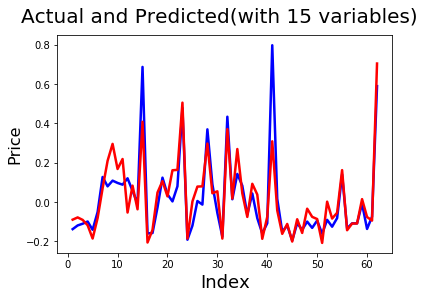

In [63]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted(with 15 variables)', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)    

Text(0, 0.5, 'ytest-ypred')

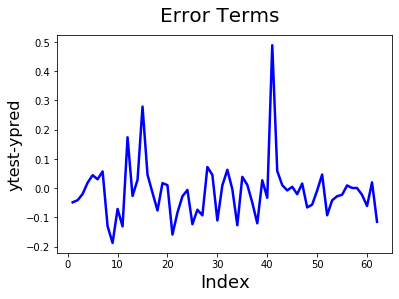

In [64]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)   

Text(0, 0.5, 'y_pred')

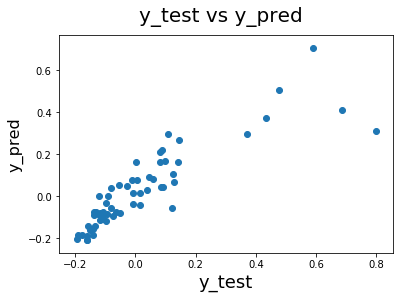

In [65]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Text(0, 0.5, 'Index')

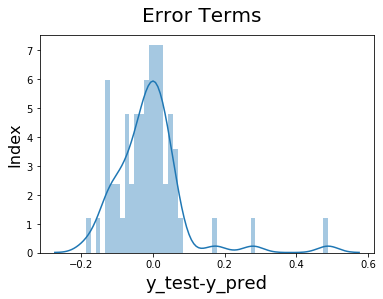

In [66]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)       

In [67]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.0989092330618446


# Third Model

In [68]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm, 8)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True False False False  True  True False False False  True False False
 False False False False False False False False False False  True False
 False False  True  True False False False False False False False False
 False False False False False False False False False  True]
[ 1 23 11 20  1  1 12  3 22  1 14 29  6  4 26 25 24 35 33 15 37 19  1 31
 17 30  1  1  2 36 28 27 38 34 16 39  7  9 10  8 21 32  5 18 13  1]


In [69]:
col = X_train.columns[rfe.support_]

In [70]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [71]:
X_train_rfe.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'rear eng_loc',
       'three no_cyl', 'twelve no_cyl', 'rotor eng_typ'],
      dtype='object')

In [72]:
lm_2 = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

In [73]:
#Let's see the summary of our linear model
print(lm_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              98.41
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                    1.64e-52
Time:                        19:53:24   Log-Likelihood:                          169.57
No. Observations:                 143   AIC:                                     -323.1
Df Residuals:                     135   BIC:                                     -299.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

print(X_test.columns)
X_test_rfe.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '-2 symb', '0 symb', '1 symb',
       '2 symb', '3 symb', 'gas', 'turbo aspi', 'two no_door', 'rwd drv_whl',
       'rear eng_loc', 'five no_cyl', 'four no_cyl', 'six no_cyl',
       'three no_cyl', 'twelve no_cyl', 'two no_cyl', '2bbl fuel_sys',
       '4bbl fuel_sys', 'idi fuel_sys', 'mfi fuel_sys', 'mpfi fuel_sys',
       'spdi fuel_sys', 'spfi fuel_sys', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'dohcv eng_typ', 'l eng_typ', 'ohc eng_typ', 'ohcf eng_typ',
       'ohcv eng_typ', 'rotor eng_typ'],
      dtype='object')


/home/chandan/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'rear eng_loc',
       'three no_cyl', 'twelve no_cyl', 'rotor eng_typ'],
      dtype='object')

In [75]:
col = list(X_train_rfe.columns)

In [76]:
col.append('price')

In [77]:
vif_cal(input_data=car_temp[col], dependent_col = "price")

,Var,Vif
1,curbweight,9.17
2,enginesize,6.18
3,horsepower,4.42
0,wheelbase,3.77
4,rear eng_loc,1.31
6,twelve no_cyl,1.23
7,rotor eng_typ,1.18
5,three no_cyl,1.02


In [78]:
# Making predictions
y_pred = lm_2.predict(X_test_rfe)

Text(0, 0.5, 'Price')

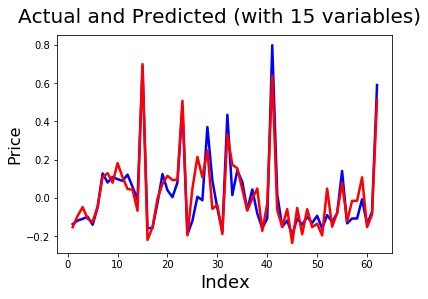

In [79]:
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted (with 15 variables)', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)    

Text(0, 0.5, 'ytest-ypred')

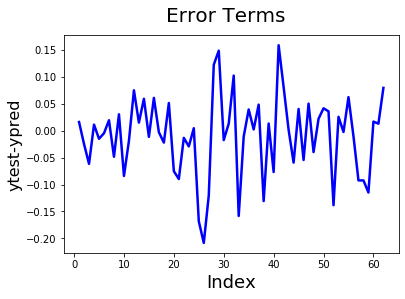

In [80]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)   

Text(0, 0.5, 'y_pred')

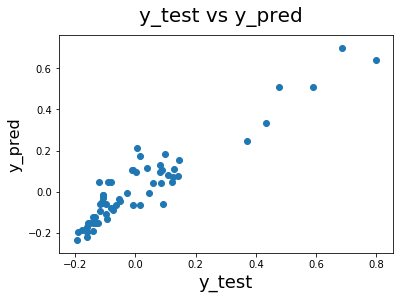

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Text(0, 0.5, 'Index')

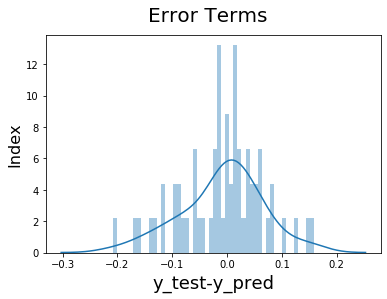

In [82]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)    

#distribution is very near to gaussian's distribution

In [83]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.07421271594407762


#####  Final model includes 8 features with all Variance Inflation score less than 10 and p value showing significance less than 0.5 and Root Mean Square Error Close 0.08

In [84]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.8723854543349219
